In [1]:
import sys
print(sys.version)

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [ ]:
# AI Music Healthcare Generator
## A 2025 Research Project using Generative AI for Therapeutic Music

This project generates personalized music based on patient vital signs using state-of-the-art AI music generation APIs.

In [3]:
import os

folders = ["data/wesad", "models", "utils", "logs", "streamlit_app"]
for folder in folders:
    os.makedirs(folder, exist_ok=True)


In [4]:
import neurokit2 as nk


In [5]:
import neurokit2 as nk
import matplotlib.pyplot as plt


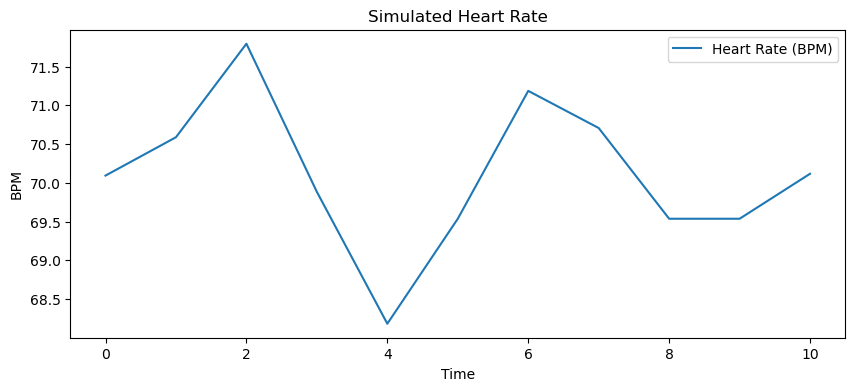

In [6]:
# Simulate 10 seconds of ECG signal
ecg_signal = nk.ecg_simulate(duration=10, sampling_rate=700)

# Clean and process ECG
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=700)
ecg_peaks, _ = nk.ecg_peaks(ecg_cleaned, sampling_rate=700)
heart_rate = nk.ecg_rate(ecg_peaks, sampling_rate=700)

# Plot heart rate
plt.figure(figsize=(10, 4))
plt.plot(heart_rate, label="Heart Rate (BPM)")
plt.title("Simulated Heart Rate")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.legend()
plt.show()


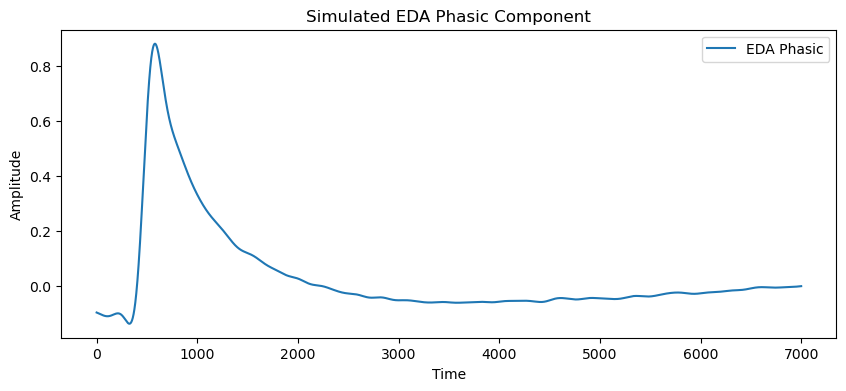

In [7]:
# Simulate 10 seconds of EDA signal
eda_signal = nk.eda_simulate(duration=10, sampling_rate=700)

# Clean and process EDA
eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=700)
eda_phasic = nk.eda_phasic(eda_cleaned, sampling_rate=700)

# Plot EDA phasic component
plt.figure(figsize=(10, 4))
plt.plot(eda_phasic["EDA_Phasic"], label="EDA Phasic")
plt.title("Simulated EDA Phasic Component")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [8]:
import sys
print(sys.executable)


c:\Users\Joya Parveen\Videos\New folder\python.exe


In [9]:
import pickle

file_path = r"C:\Users\Joya Parveen\OneDrive\Desktop\ai-music-healthcare-project\data\wesad\WESAD\S2\S2.pkl"

# Load using 'latin1' encoding to avoid Unicode errors
with open(file_path, "rb") as file:
    data = pickle.load(file, encoding='latin1')

# See what’s inside
print(data.keys())


dict_keys(['signal', 'label', 'subject'])


In [10]:
print(data['signal'].keys())


dict_keys(['chest', 'wrist'])


In [11]:
print("Chest signals:", data['signal']['chest'].keys())
print("Wrist signals:", data['signal']['wrist'].keys())


Chest signals: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
Wrist signals: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])


In [12]:
# Extract ECG and EDA from chest
ecg_signal = data['signal']['chest']['ECG'][:, 0]  # ECG channel
eda_signal = data['signal']['chest']['EDA'][:, 0]  # EDA channel

print("ECG length:", len(ecg_signal))
print("EDA length:", len(eda_signal))


ECG length: 4255300
EDA length: 4255300


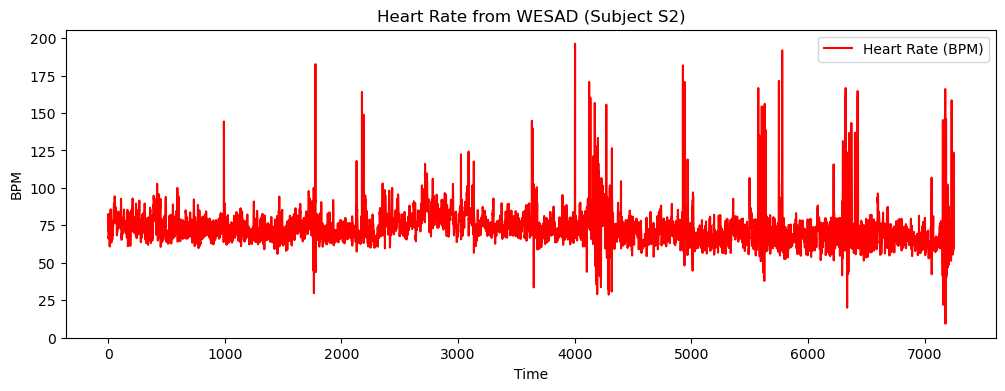

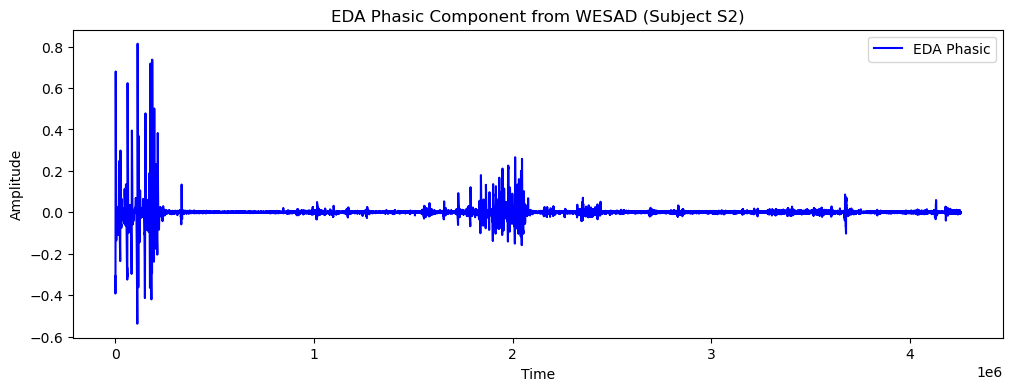

In [13]:
import neurokit2 as nk
import matplotlib.pyplot as plt

# Sampling rate for chest signals in WESAD is 700 Hz
sampling_rate = 700

# Clean ECG and extract heart rate
ecg_cleaned = nk.ecg_clean(ecg_signal, sampling_rate=sampling_rate)
ecg_peaks, _ = nk.ecg_peaks(ecg_cleaned, sampling_rate=sampling_rate)
heart_rate = nk.ecg_rate(ecg_peaks, sampling_rate=sampling_rate)

# Clean EDA and extract phasic component
eda_cleaned = nk.eda_clean(eda_signal, sampling_rate=sampling_rate)
eda_phasic = nk.eda_phasic(eda_cleaned, sampling_rate=sampling_rate)

# Plot heart rate
plt.figure(figsize=(12, 4))
plt.plot(heart_rate, label="Heart Rate (BPM)", color='red')
plt.title("Heart Rate from WESAD (Subject S2)")
plt.xlabel("Time")
plt.ylabel("BPM")
plt.legend()
plt.show()

# Plot EDA phasic
plt.figure(figsize=(12, 4))
plt.plot(eda_phasic["EDA_Phasic"], label="EDA Phasic", color='blue')
plt.title("EDA Phasic Component from WESAD (Subject S2)")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [14]:
# Get emotion labels
labels = data['label']

# Print unique labels
print("Unique labels:", set(labels))


Unique labels: {0, 1, 2, 3, 4, 6, 7}


New sample size: 212765

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.47      0.58     21427
           1       0.74      0.67      0.70     21427
           2       0.72      0.75      0.73     21427
           3       0.76      0.76      0.76     21427
           4       0.78      0.76      0.77     21427
           6       0.79      0.98      0.87     21427
           7       0.75      0.93      0.83     21427

    accuracy                           0.76    149989
   macro avg       0.76      0.76      0.75    149989
weighted avg       0.76      0.76      0.75    149989

Macro F1 Score: 0.749


C:\Users\Joya Parveen\AppData\Local\Temp\ipykernel_37216\2026429857.py:57: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
c:\Users\Joya Parveen\Videos\New folder\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


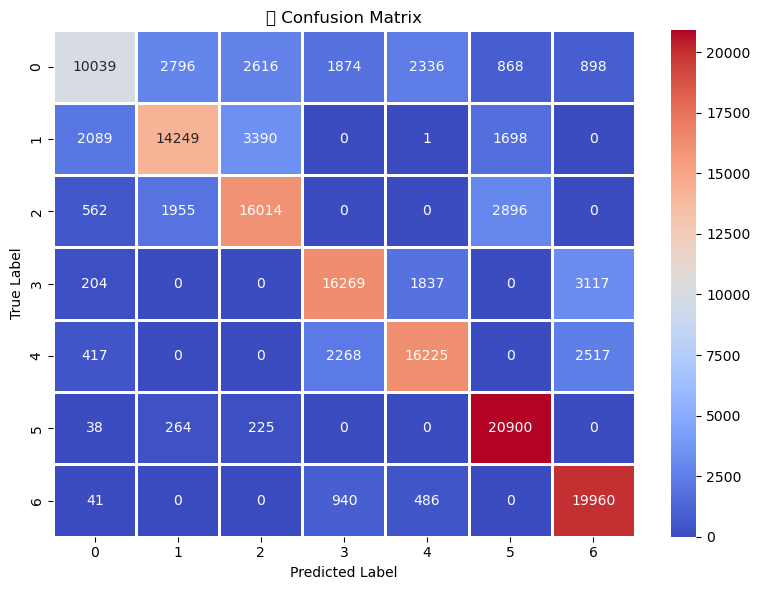

Average Cross-Val Accuracy: 0.712


In [15]:
# 📦 Import dependencies
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# 📈 Step 1: Combine ECG and EDA signals
# (Assumes ecg_signal and eda_signal are lists or arrays, and data['label'] exists)
ecg_array = np.array(ecg_signal)
eda_array = np.array(eda_signal)
labels_array = np.array(data['label'])

# 🧠 Create feature matrix
X_all = np.stack([ecg_array, eda_array], axis=1)
y_all = labels_array

# 🪄 Optional: Downsample (less aggressive)
X_small = X_all[::20]
y_small = y_all[::20]
print("New sample size:", len(X_small))

# 🎯 Step 2: Balance data with SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_small, y_small)

# 🧪 Step 3: Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# 🌳 Step 4: Train tuned Random Forest
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,
    min_samples_split=4,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# 🎯 Step 5: Evaluate model
y_pred = model.predict(X_test)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("Macro F1 Score:", round(f1_score(y_test, y_pred, average='macro'), 3))

# 🌈 Step 6: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', linewidths=1)
plt.title("🎯 Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 🚀 Step 7: Optional Cross-Validation Score
cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='accuracy')
print("Average Cross-Val Accuracy:", round(np.mean(cv_scores), 3))


In [16]:
# Combine ECG and EDA for all samples
import numpy as np
# Convert signals to NumPy arrays
ecg_array = np.array(ecg_signal)
eda_array = np.array(eda_signal)
labels_array = np.array(data['label'])

# Combine ECG and EDA into one feature set
X_all = np.stack([ecg_array, eda_array], axis=1)

# Use all labels as targets
y_all = labels_array


In [17]:
new_sample = [0.45, 0.67]  # Just two values!
import numpy as np
new_sample = np.array(new_sample).reshape(1, -1)

predicted_emotion = model.predict(new_sample)[0]

emotion_to_music = {
    0: "Calm instrumental",
    1: "Upbeat pop",
    2: "Energetic workout tracks",
    3: "Focus-enhancing ambient",
    4: "Happy dance tunes",
    6: "Relaxing nature sounds",
    7: "Soothing acoustic"
}

recommended_music = emotion_to_music.get(predicted_emotion, "Default playlist")
print("Predicted emotion:", predicted_emotion)
print("Recommended music:", recommended_music)
print("Expected number of features:", model.n_features_in_)


Predicted emotion: 4
Recommended music: Happy dance tunes
Expected number of features: 2


In [18]:
import webbrowser

query = recommended_music + " playlist"
url = f"https://www.youtube.com/results?search_query={query}"
webbrowser.open(url)


True

In [19]:
!pip install youtube-search-python


In [20]:
import numpy as np

# Example input with 2 features (adjust values as needed)
new_sample = [0.45, 0.67]
new_sample = np.array(new_sample).reshape(1, -1)

# Predict emotion
predicted_emotion = model.predict(new_sample)[0]

# Map emotion to music
emotion_to_music = {
    0: "Calm instrumental",
    1: "Upbeat pop",
    2: "Energetic workout tracks",
    3: "Focus-enhancing ambient",
    4: "Happy dance tunes",
    6: "Relaxing nature sounds",
    7: "Soothing acoustic"
}

recommended_music = emotion_to_music.get(predicted_emotion, "Default playlist")


In [21]:
import webbrowser

search_query = recommended_music + " playlist"
url = f"https://www.youtube.com/results?search_query={search_query}"
webbrowser.open(url)
try:
    from youtubesearchpython import VideosSearch
    search_query = recommended_music + " playlist"
    videosSearch = VideosSearch(search_query, limit=1)
    video_url = videosSearch.result()['result'][0]['link']
    webbrowser.open(video_url)
except Exception as e:
    print("Error fetching video:", e)
    # Fallback to search page
    fallback_url = f"https://www.youtube.com/results?search_query={search_query}"
    webbrowser.open(fallback_url)


Error fetching video: post() got an unexpected keyword argument 'proxies'


In [22]:
!pip install youtube-search-python==1.6.5


In [23]:
import webbrowser

search_query = recommended_music + " playlist"
url = f"https://www.youtube.com/results?search_query={search_query}"
webbrowser.open(url)


True

In [24]:
!pip install streamlit

In [28]:
import joblib
import os

# Create path if it doesn't exist
save_dir = r"C:\Users\Joya Parveen\OneDrive\Desktop\ai-music-healthcare-project\models"
os.makedirs(save_dir, exist_ok=True)

# Replace 'RandomForestClassifier' with your trained model variable name
joblib.dump(RandomForestClassifier, os.path.join(save_dir, 'RandomForestClassifier.pkl'))

print("Model saved successfully at:", os.path.join(save_dir, 'RandomForestClassifier.pkl'))


Model saved successfully at: C:\Users\Joya Parveen\OneDrive\Desktop\ai-music-healthcare-project\models\RandomForestClassifier.pkl
